# Introduction

In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [58]:
# Create data
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)/10


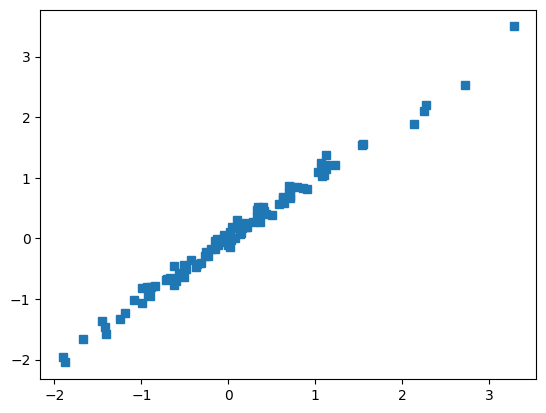

In [59]:
plt.plot(x, y, 's')
plt.show()

In [60]:
#  model
ann = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1)  # output layer
)

ann

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [61]:
lnr = 0.05
lossfn = nn.MSELoss()
# Optimizer is the flavor of the gradient decent
optimizer = torch.optim.SGD(ann.parameters(), lr=lnr)

In [62]:
epochs = 500
losses = torch.zeros(epochs)

for i in range(epochs):
    # forward pass
    yhat = ann(x)
    # loss
    loss = lossfn(yhat, y)
    losses[i] = loss
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [63]:
# final forward pass
preds = ann(x)

# final loss
testloss = (preds - y).pow(2).mean()

In [64]:
testloss

tensor(0.0188, grad_fn=<MeanBackward0>)

In [65]:
testloss.detach()

tensor(0.0188)

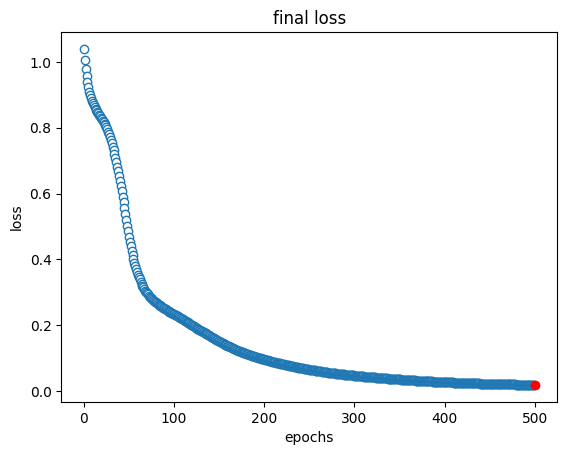

In [66]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(epochs, testloss.detach(), 'ro')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('final loss')
plt.show()

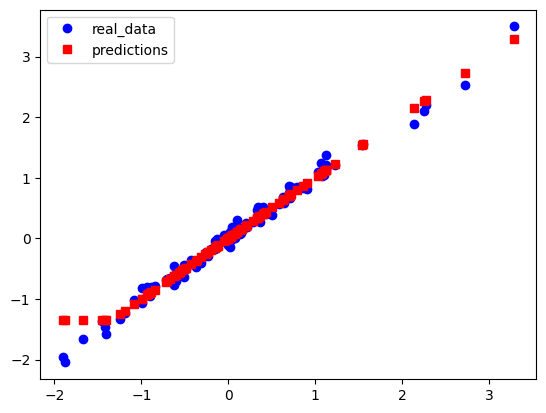

In [67]:
plt.plot(x, y, 'bo', label='real_data')
plt.plot(x, preds.detach(), 'rs', label='predictions')
plt.legend()
plt.show()

# Code challenge

In [1]:
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [46]:
#  model
def model(input, output):
        ann = nn.Sequential(
                nn.Linear(1,1),
                nn.ReLU(),
                nn.Linear(1,1)
        )

        lnr = 0.05
        lossfn = nn.MSELoss()
        optimizer = torch.optim.SGD(ann.parameters(), lr=lnr)
        epochs = 500
        losses = torch.zeros(epochs)

        for i in range(epochs):
                # forward pass
                yhat = ann(input)
                # loss
                loss = lossfn(yhat, output)
                losses[i] = loss
                # backprop
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
        preds = ann(input)
        
        return preds, losses

In [50]:
def create_data(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x, y

In [58]:
test_x, test_y = create_data(0.9)

In [59]:
test_preds, test_losses = model(test_x, test_y)

In [83]:
# Create data for experiments
parameter = np.linspace(-2, 2, 21)
result = np.zeros((len(parameter), 5, 2))
for m in range(len(parameter)):
    for exp in range(5):
        x, y = create_data(parameter[m])
        preds, losses = model(x, y)
        result[m, exp, 0] = losses[-1]
        result[m, exp, 1] = np.corrcoef(y.T, preds.T)[0,1]


d:\repos\.udemy\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\repos\.udemy\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [84]:
result[np.isnan(result)] = 0

In [91]:
result.shape

(21, 5, 2)

In [94]:
np.mean(result[:,:,1], axis=1)

array([0.5767256 , 0.57909143, 0.75893476, 0.37346837, 0.54364486,
       0.53665076, 0.48980425, 0.77916764, 0.52473261, 0.35488057,
       0.0459299 , 0.23869977, 0.46607831, 0.30912822, 0.50536666,
       0.54644226, 0.91804057, 0.55599511, 0.56600117, 0.76496872,
       0.77535097])

In [86]:
parameter

array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
        0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ])

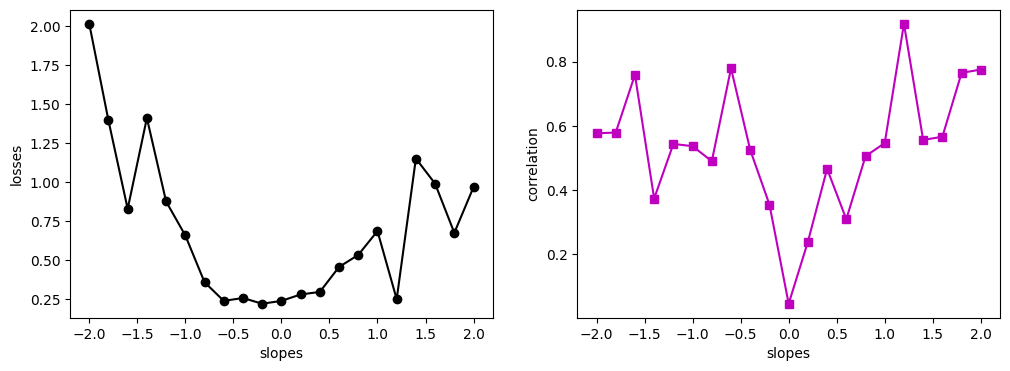

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(parameter, np.mean(result[:,:,0], axis=1), 'ko-')
ax[0].set_xlabel('slopes')
ax[0].set_ylabel('losses')
ax[1].plot(parameter, np.mean(result[:,:,1], axis=1), 'ms-')
ax[1].set_xlabel('slopes')
ax[1].set_ylabel('correlation')
plt.show()